In [90]:
#Hace falta instalar geoplot, no esta dentro del ambiente especificado
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import shapely as shp
import geoplot
import folium
import seaborn as sns
import statsmodels.api as sm
import statsmodels.api as smapi

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.arima_model import ARIMA
%matplotlib inline

## Define funciones

In [2]:
def choropleth(geo_df,col):
    """
    Imprime mapa a partir de GeoDataFrame geo_df, mostrando la columna especificada
    """
    return geoplot.choropleth(geo_df,hue=geo_df[col],figsize=(10,10),cmap='RdBu')

### Importa tablas de dataset

In [3]:
geographic = pd.read_csv('../Dataset/geographic.csv')
geographic.head()

,BK88,QN52,QN48,QN51,QN27,BX35,BX98,QN07,MN06,QN02,...,MN25,MN24,MN23,MN13,MN15,MN32,MN33,MN99,QN18,QN29
0,-73.976051,-73.794934,-73.775740,-73.803792,-73.861099,-73.896967,-73.872873,-73.757258,-73.946080,-73.760316,...,-74.000784,-73.992605,-73.989904,-74.001535,-73.993833,-73.938048,-73.935054,-74.010930,-73.858726,-73.867911
1,40.631284,40.757806,40.743334,40.775618,40.763673,40.834350,40.785983,40.718147,40.821271,40.675118,...,40.694295,40.724145,40.734443,40.762653,40.772940,40.780838,40.791695,40.684500,40.735717,40.744942
2,-73.977167,-73.794749,-73.775799,-73.800991,-73.859931,-73.896787,-73.872886,-73.755890,-73.946404,-73.758806,...,-74.000960,-73.992634,-73.989870,-74.001339,-73.993789,-73.937903,-73.935108,-74.011934,-73.858672,-73.867877
3,40.630755,40.755636,40.743326,40.775397,40.762209,40.834133,40.785971,40.716307,40.820580,40.673014,...,40.694077,40.724065,40.733535,40.762217,40.772912,40.780758,40.791658,40.683896,40.735627,40.744824
4,-73.977000,-73.794579,-73.778060,-73.798653,-73.859668,-73.896303,-73.872983,-73.754702,-73.946720,-73.758598,...,-74.003015,-73.993093,-73.990028,-74.001279,-73.993727,-73.937796,-73.935173,-74.012177,-73.858585,-73.867852


In [4]:
demographics = pd.read_csv('../Dataset/demographics.csv')
demographics.head()

,nta_name,borough,nta_code,population,under_5_years,5-9_years,10-14_years,15-19_years,20-24_years,25-29_years,...,15000_to_24999,25000_to_34999,35000_to_49999,50000_to_74999,75000_to_99999,100000_to_149999,150000_to_199999,200000_or_more,median_income,mean_income
0,Allerton-Pelham Gardens,Bronx,BX31,28903,1679,1706,1763,2039,1964,1703,...,797,773,1160,1764,1155,1562,765,427,61638,78489
1,Annadale-Huguenot-Prince's Bay-Eltingville,Staten Island,SI01,27770,1397,1698,1817,1880,1720,1594,...,571,405,1008,1523,1346,2075,1086,1151,88288,109187
2,Arden Heights,Staten Island,SI48,25238,1507,1540,1596,1752,1614,1561,...,337,516,707,1421,1611,2021,1047,740,89570,101627
3,Astoria,Queens,QN70,78793,3480,3037,3060,3392,6630,11586,...,3673,2816,4725,6463,4557,4698,1627,1197,54882,70094
4,Auburndale,Queens,QN48,19996,917,966,1063,1168,1214,1307,...,445,632,690,1417,1060,1237,589,433,70772,84402


In [5]:
weather = pd.read_csv('../Dataset/weather.csv')

In [6]:
weather.head()

,date,max_temp,min_temp,avg_temp,precipitation,snowfall,snow_depth,location,latitude,longitude
0,1/1/14,34,24,29.0,0,0,0,JFK,40.64749,-73.779982
1,1/2/14,33,19,26.0,0.13,2.4,0,JFK,40.64749,-73.779982
2,1/3/14,19,9,14.0,0.22,5.5,7,JFK,40.64749,-73.779982
3,1/4/14,31,3,17.0,0,0,7,JFK,40.64749,-73.779982
4,1/5/14,49,23,36.0,0.1,,6,JFK,40.64749,-73.779982


In [7]:
mta_trips = pd.read_csv('../Dataset/mta_trips.csv')

C:\Users\Jazuero\AppData\Local\Continuum\anaconda3\envs\cursoML\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
mta_trips.head()

,station,line_name,division,audit_type,unit_id,datetime,new_entries,new_exits,latitude,longitude
0,WHITEHALL ST,R1,BMT,REGULAR,R001_A058_01-00-00,03/29/2014 05:00:00,4,6,40.703087,-74.012994
1,WHITEHALL ST,R1,BMT,REGULAR,R001_A058_01-00-00,03/29/2014 09:00:00,1,13,40.703087,-74.012994
2,WHITEHALL ST,R1,BMT,REGULAR,R001_A058_01-00-00,03/29/2014 13:00:00,1,8,40.703087,-74.012994
3,WHITEHALL ST,R1,BMT,REGULAR,R001_A058_01-00-00,03/29/2014 17:00:00,1,8,40.703087,-74.012994
4,WHITEHALL ST,R1,BMT,REGULAR,R001_A058_01-00-00,03/29/2014 21:00:00,2,3,40.703087,-74.012994


In [9]:
viajes_uber_2014 = pd.read_csv('../Dataset/uber_trips_2014.csv')

In [10]:
viajes_uber_2014.head()

,pickup_datetime,pickup_latitude,pickup_longitude,base
0,4/1/14 0:11,40.7690,-73.9549,B02512
1,4/1/14 0:17,40.7267,-74.0345,B02512
2,4/1/14 0:21,40.7316,-73.9873,B02512
3,4/1/14 0:28,40.7588,-73.9776,B02512
4,4/1/14 0:33,40.7594,-73.9722,B02512


### Prepara shape a partir de geographic y demographic

In [11]:
res_dic = {}
for c in geographic.columns:
    res_dic[c] = []

In [12]:
for i in np.arange(0,len(geographic),2):
    for c in geographic.columns:
        if not(np.isnan(geographic.iloc[i].loc[c]) or np.isnan(geographic.iloc[i+1].loc[c])):
            res_dic[c] = res_dic[c] + [(geographic.iloc[i].loc[c],geographic.iloc[i+1].loc[c])]

In [13]:
geo_df_res = gpd.GeoDataFrame(columns = ['geometry','nta_code'])

for z in res_dic:
    geo_df_res.loc[z] = shp.geometry.Polygon(tuple(res_dic[z]))

geo_df_res['nta_code']=geo_df_res.index  

In [14]:
geo_df_res

,geometry,nta_code
BK88,"POLYGON ((-73.97605 40.63128, -73.97717 40.630...",BK88
QN52,"POLYGON ((-73.79493 40.75781, -73.79475 40.755...",QN52
QN48,"POLYGON ((-73.77574 40.74333, -73.77580 40.743...",QN48
QN51,"POLYGON ((-73.80379 40.77562, -73.80099 40.775...",QN51
QN27,"POLYGON ((-73.86110 40.76367, -73.85993 40.762...",QN27
...,...,...
MN32,"POLYGON ((-73.93805 40.78084, -73.93790 40.780...",MN32
MN33,"POLYGON ((-73.93505 40.79170, -73.93511 40.791...",MN33
MN99,"POLYGON ((-74.01093 40.68450, -74.01193 40.683...",MN99
QN18,"POLYGON ((-73.85873 40.73572, -73.85867 40.735...",QN18


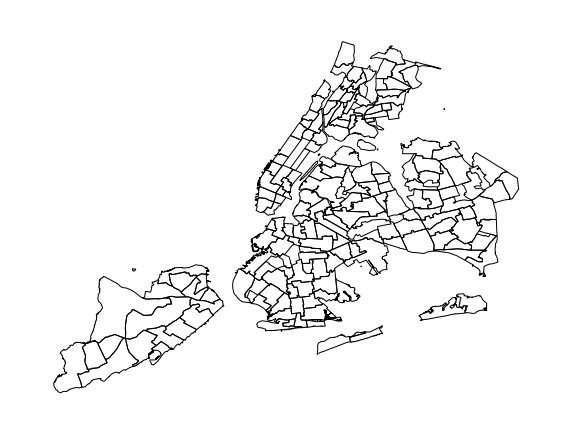

In [15]:
geoplot.polyplot(geo_df_res,figsize=(10,10))

In [16]:
merged = pd.merge(geo_df_res, demographics, on='nta_code', how='inner')
merged.head()

,geometry,nta_code,nta_name,borough,population,under_5_years,5-9_years,10-14_years,15-19_years,20-24_years,...,15000_to_24999,25000_to_34999,35000_to_49999,50000_to_74999,75000_to_99999,100000_to_149999,150000_to_199999,200000_or_more,median_income,mean_income
0,"POLYGON ((-73.97605 40.63128, -73.97717 40.630...",BK88,Borough Park,Brooklyn,106357,14703,11971,10024,9094,8640,...,4893,3850,3711,4098,2136,2486,1043,783,35754,55689
1,"POLYGON ((-73.79493 40.75781, -73.79475 40.755...",QN52,East Flushing,Queens,26982,1350,1318,1281,1602,2048,...,853,739,1151,1329,1080,1386,425,316,55971,70852
2,"POLYGON ((-73.77574 40.74333, -73.77580 40.743...",QN48,Auburndale,Queens,19996,917,966,1063,1168,1214,...,445,632,690,1417,1060,1237,589,433,70772,84402
3,"POLYGON ((-73.80379 40.77562, -73.80099 40.775...",QN51,Murray Hill,Queens,51739,2539,2295,2254,2743,3236,...,1665,2443,2151,2850,2140,2233,1031,906,52696,71925
4,"POLYGON ((-73.86110 40.76367, -73.85993 40.762...",QN27,East Elmhurst,Queens,23150,1621,1479,1431,1816,1944,...,617,730,1004,1173,860,766,295,128,51594,66284


In [17]:
merged.crs = {'init' :'epsg:4326'}

In [18]:
#merged.to_file('geographic1.shp')

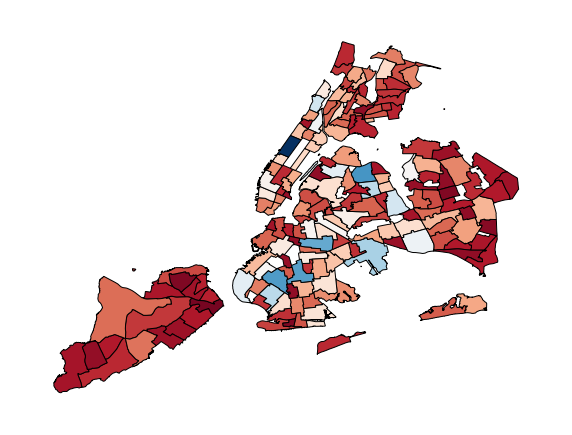

In [19]:
choropleth(merged,'population')

### Base weather

In [20]:
weather_stations = gpd.GeoDataFrame(weather.groupby('location').mean()[['longitude','latitude']])

In [21]:
weather_stations

,longitude,latitude
location,,
Central Park,-73.974187,40.771133
JFK,-73.779982,40.647490
LGA,-73.873966,40.776927


In [22]:
weather_stations['geometry'] = weather_stations.apply(lambda row: 
                                        shp.geometry.Point(row['longitude'],row['latitude']),axis=1)

In [23]:
weather_stations.crs = {'init' :'epsg:4326'}

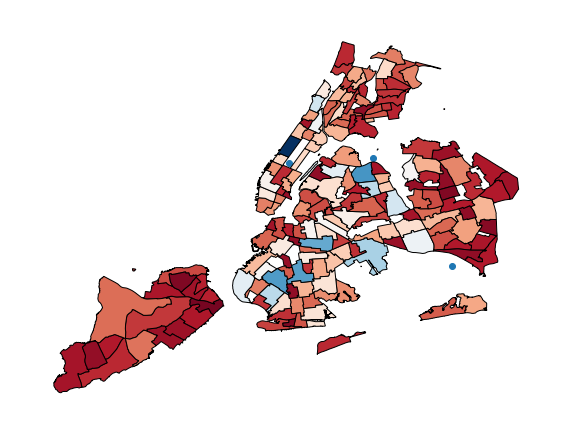

In [24]:
ax = choropleth(merged,'population')
weather_stations.plot(ax=ax)

In [25]:
weather_stations.drop(['longitude','latitude'],axis=1,inplace=True)

In [26]:
for i in range (0,3):
    merged['distance'+weather_stations.index[i]] = merged['geometry'].distance(weather_stations.iloc[i,0])

In [27]:
dicStation = {
    0: 'CP',
    1: 'JFK',
    2: 'LGA'
}
merged['WeatherStation'] = merged.apply(lambda row: dicStation[list(row[-3:]).index(min(list(row[-3:])))],axis=1)

In [28]:
merged.drop(['distanceCentral Park','distanceJFK','distanceLGA'],inplace=True,axis=1)

### Mta trips

### Analisis viajes Uber 2014

In [29]:
#Convierte longitud y latiud a una geometria de shapely
viajes_uber_2014['geometry'] = viajes_uber_2014.apply(lambda row: 
                                    shp.geometry.Point((row['pickup_longitude'],row['pickup_latitude'])),axis=1)
viajes_uber_2014.drop(['pickup_latitude','pickup_longitude','base'],axis=1,inplace=True)
                                                      

In [30]:
#Transforma hora de string a datetime
viajes_uber_2014['datetime'] = pd.to_datetime(viajes_uber_2014['pickup_datetime'],infer_datetime_format=True)

In [31]:
viajes_uber_2014.drop(['pickup_datetime'],axis=1,inplace=True)

In [33]:
type(viajes_uber_2014['datetime'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [34]:
#Obtiene identificador unico del dia de viaje
viajes_uber_2014['dia'] = viajes_uber_2014['datetime'].map(lambda x: pd.Timestamp(year = x.year, 
                                                                                  month=x.month, day=x.day))

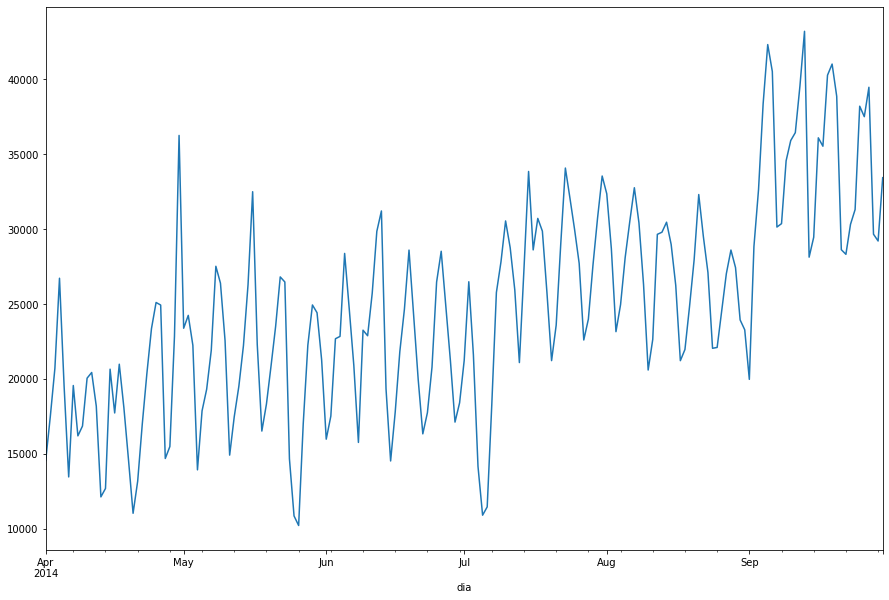

In [35]:
#Genera y plotea viajes por dia
uber_2014_dia = viajes_uber_2014.groupby('dia').count()['datetime']
ax = uber_2014_dia.plot()
ax.figure.set_size_inches(15,10)

In [55]:
uber_2014_dia_df = pd.DataFrame(uber_2014_dia)
uber_2014_dia_df['weekday'] = uber_2014_dia_df.index.map(lambda x: x.weekday_name)

,datetime,weekday
dia,,
2014-04-01,14546,Tuesday
2014-04-02,17474,Wednesday
2014-04-03,20701,Thursday
2014-04-04,26714,Friday
2014-04-05,19521,Saturday
2014-04-06,13445,Sunday
2014-04-07,19550,Monday
2014-04-08,16188,Tuesday
2014-04-09,16843,Wednesday


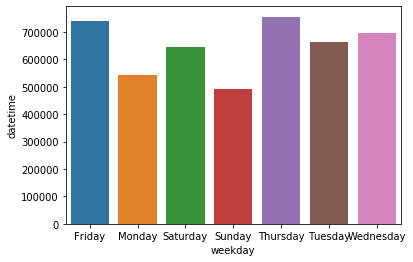

In [61]:
sns.barplot(uber_2014_dia_df.groupby('weekday').sum()['datetime'].index,
            uber_2014_dia_df.groupby('weekday').sum()['datetime'])

In [52]:
diaas.value_counts()

Tuesday      27
Sunday       26
Friday       26
Saturday     26
Wednesday    26
Monday       26
Thursday     26
Name: dia, dtype: int64

In [36]:
viajes_uber_2014 = gpd.GeoDataFrame(viajes_uber_2014)
viajes_uber_2014.crs = {'init': 'epsg:4326'}

In [37]:
viajes_uber_2014 = gpd.sjoin(viajes_uber_2014, merged[['geometry','nta_code']], op='intersects')

In [38]:
viajes_uber_2014.drop(['index_right','dia'],axis=1,inplace=True)

In [39]:
viajes_uber_2014

,geometry,datetime,nta_code
2,POINT (-73.98730 40.73160),2014-04-01 00:21:00,MN22
10,POINT (-73.98690 40.72560),2014-04-01 01:19:00,MN22
12,POINT (-73.98030 40.72710),2014-04-01 01:49:00,MN22
23,POINT (-73.98440 40.72500),2014-04-01 04:19:00,MN22
75,POINT (-73.98630 40.73220),2014-04-01 06:32:00,MN22
...,...,...,...
4193195,POINT (-74.00080 40.69430),2014-09-06 11:41:00,MN25
4438144,POINT (-74.00080 40.69430),2014-09-17 16:32:00,MN25
2196198,POINT (-74.21570 40.52580),2014-07-06 19:20:00,SI11
2824026,POINT (-74.23080 40.52720),2014-08-15 23:00:00,SI11


In [118]:
#viajes_uber_2014.drop('datetime',axis=1).to_file('../Shapes/viajes_uber_2014.shp')

### Yellow

In [62]:
yellow = pd.read_csv('../Dataset/yellow_trips_new.csv') 

In [63]:
day_list = []

for i in yellow['pickup_datetime']:
    day_list.append(i[:10])
    
yellow['pickup_day'] = pd.to_datetime(day_list, format='%Y-%m-%d')

day_list_ = []

for i in yellow['dropoff_datetime']:
    day_list_.append(i[:10])
    
yellow['dropoff_day'] = pd.to_datetime(day_list_, format='%Y-%m-%d')

In [64]:
pickup = yellow.groupby('pickup_day')['pickup_day'].count()

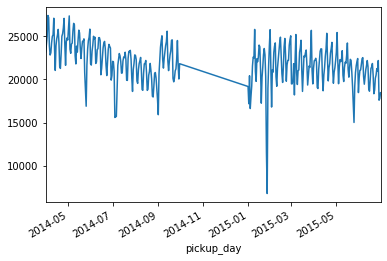

In [66]:
pickup.plot()

### Uber 2015

In [68]:
uber15 = pd.read_csv('../Dataset/uber_trips_2015.csv')

In [69]:
day_list = []

for i in uber15['pickup_datetime']:
    day_list.append(i[:10])
    
uber15['pickup_day'] = pd.to_datetime(day_list, format='%Y-%m-%d')

In [70]:
pickup_uber_2015 = uber15.groupby(['pickup_day'])[['pickup_day']].count()

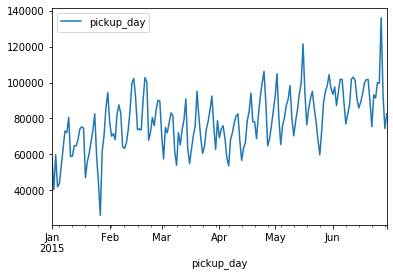

In [71]:
pickup_uber_2015.plot()

In [72]:
pickup_uber_2015_ = uber15.groupby(['pickup_day','dispatch_base'])[['pickup_day']].count()

dispatch_base
B02512    AxesSubplot(0.125,0.125;0.775x0.755)
B02598    AxesSubplot(0.125,0.125;0.775x0.755)
B02617    AxesSubplot(0.125,0.125;0.775x0.755)
B02682    AxesSubplot(0.125,0.125;0.775x0.755)
B02764    AxesSubplot(0.125,0.125;0.775x0.755)
B02765    AxesSubplot(0.125,0.125;0.775x0.755)
B02835    AxesSubplot(0.125,0.125;0.775x0.755)
B02836    AxesSubplot(0.125,0.125;0.775x0.755)
Name: pickup_day, dtype: object

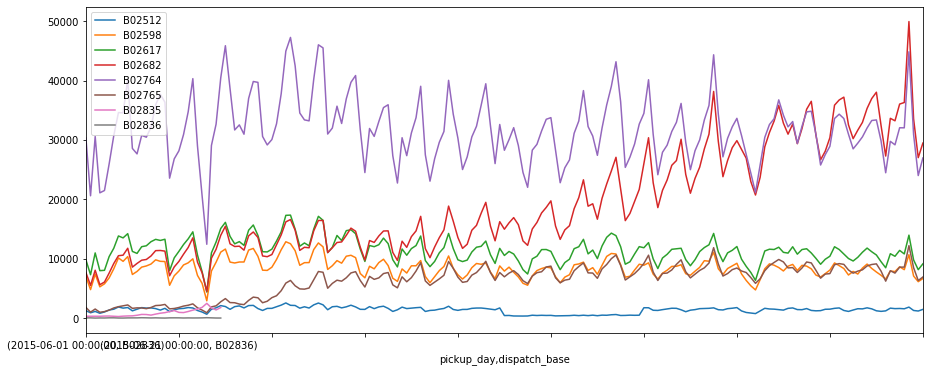

In [74]:
fig, ax = plt.subplots(figsize=(15,6))
pickup_uber_2015_.groupby('dispatch_base')['pickup_day'].plot(ax=ax, legend=True)

### Green

In [77]:
df = pd.read_csv('../Dataset/green_trips_new_2.csv')


In [78]:
year_list = []
for i in df['pickup_datetime']:
    year_list.append(i[:10])

In [79]:
df['pickup_day'] = year_list
df.head()

,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,total_amount,pickup_day
0,2015-02-01 01:26:45,2015-02-01 01:49:58,-73.953545,40.811172,-73.984764,40.728386,1,8.11,27.8,2015-02-01
1,2015-01-02 20:06:28,2015-01-02 20:14:04,-73.946709,40.714321,-73.961571,40.711475,1,1.29,9.8,2015-01-02
2,2014-09-27 17:55:38,2014-09-27 18:19:56,-73.957626,40.718094,-73.947304,40.777813,5,6.12,26.3,2014-09-27
3,2014-04-27 02:27:04,2014-04-27 02:39:02,-73.949501,40.713997,-73.987785,40.718582,2,3.68,17.3,2014-04-27
4,2014-05-26 18:32:19,2014-05-26 18:44:13,-73.944092,40.672195,-73.977325,40.664013,1,2.40,11.5,2014-05-26


In [80]:
df['pickup_day'] = pd.to_datetime(df['pickup_day'], format='%Y-%m-%d')

In [81]:
group=df.groupby(['pickup_day'])[['pickup_day']].count()
group.head()

,pickup_day
pickup_day,
2014-04-01,7203
2014-04-02,7573
2014-04-03,8341
2014-04-04,10248
2014-04-05,11444


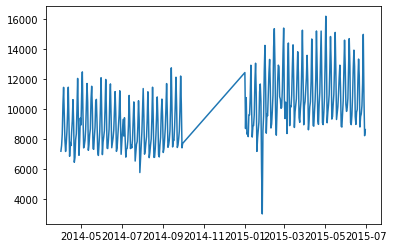

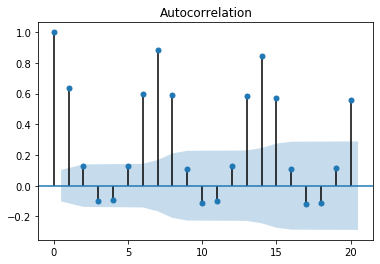

In [85]:
group.columns=['rides']
plt.plot(group['rides'])
plot_acf(group['rides'],lags=20,unbiased=False);

In [86]:
group['ano'] = list(map(lambda x: x.year, list(group.index)))

In [87]:
group2 = group[group['ano']==2014]

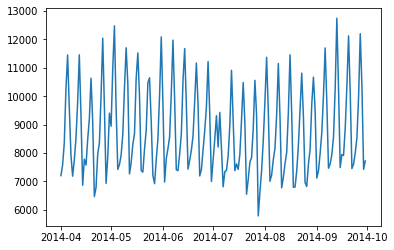

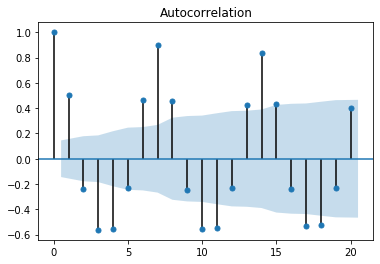

In [89]:
group.columns=['rides','ano']
plt.plot(group2['rides'])
plot_acf(group2['rides'],lags=20,unbiased=False);

# Folium

In [62]:
mapa = folium.Map([40.7,-73.95],tiles='cartodbpositron')

In [63]:
zonas = folium.features.Choropleth(merged,data=merged,key_on='feature.properties.nta_code',
                                   columns=['nta_code','median_age'],fill_color='RdPu').add_to(mapa)

In [64]:
mapa.save('../Mapas/mapa2.html')